# Object Detection with YOLO v3

This notebook uses a [PyTorch port](https://github.com/ayooshkathuria/pytorch-yolo-v3) of [YOLO v3](https://pjreddie.com/darknet/yolo/) to detect objects on a given image.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install ayooshkathuria/pytorch-yolo-v3

In [6]:
!pip install matplotlib
!conda install pytorch torchvision -c pytorch -y

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - pytorch
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.5.30  |       ha878542_0         136 KB  conda-forge
    certifi-2021.5.30          |   py37h89c1867_0         141 KB  conda-forge
    cudatoolkit-10.1.243       |       h6bb024c_0       347.4 MB  defaults
    intel-openmp-2021.3.0      |    h06a4308_3350         1.4 MB  defaults
    mkl-2021.3.0               |     h06a4308_520   

In [8]:
!pip install opencv-python

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 49.9 MB 7.9 MB/s eta 0:00:01    |█▋                              | 2.5 MB 7.9 MB/s eta 0:00:07


In [1]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/ayooshkathuria/pytorch-yolo-v3.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q $git_repo_url
  #!cd $project_name && pip install -q -r requirement.txt
  
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

## Download official YOLO v3 pretrained weights

In [2]:
if not exists('yolov3.weights'):
  !wget -q https://pjreddie.com/media/files/yolov3.weights

## Detect objects on a test image

First, dowload a test image from internet:

hond.png


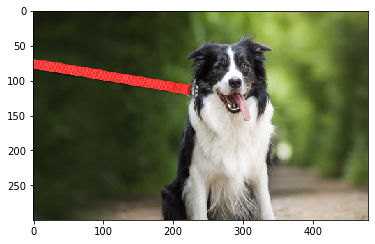

In [55]:
#IMAGE_URL = 'https://raw.githubusercontent.com/tugstugi/dl-colab-notebooks/master/resources/lidl.jpg'
IMAGE_URL = 'hond.png'
image_file = basename(IMAGE_URL)
print(image_file)
#image_file ='pytorch-yolo-v3/imgs/dog.jpg'
#!wget -q -O $image_file $IMAGE_URL
plt.imshow(matplotlib.image.imread(image_file))

Execute `detect.py` on that image and show the result:

Loading network.....
Network successfully loaded
hond.png             predicted in  0.491 seconds
Objects Detected:    dog
----------------------------------------------------------

SUMMARY
----------------------------------------------------------
Task                     : Time Taken (in seconds)

Reading addresses        : 0.000
Loading batch            : 0.664
Detection (1 images)     : 0.492
Output Processing        : 0.000
Drawing Boxes            : 0.011
Average time_per_img     : 1.168
----------------------------------------------------------


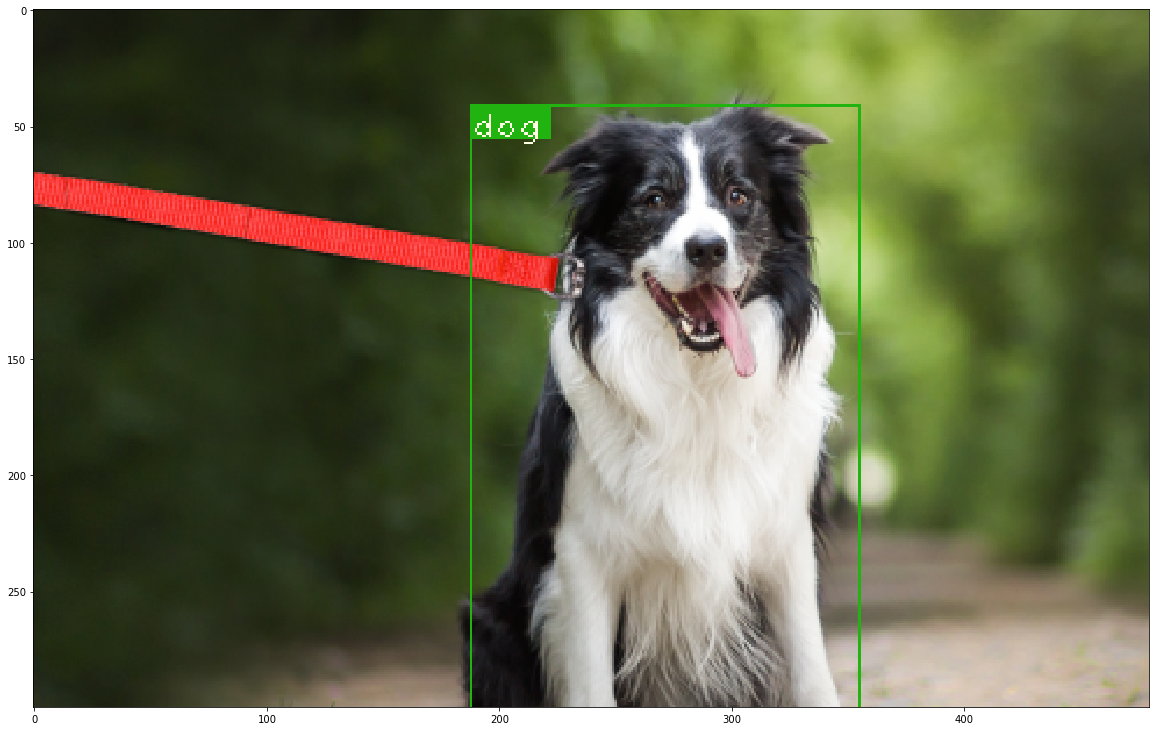

In [56]:
!cd pytorch-yolo-v3 && python detect.py --weights ../yolov3.weights --images ../$image_file --det ..

plt.figure(figsize=(20, 15))
plt.imshow(matplotlib.image.imread('det_%s' % image_file))